# Proceso de preparación de los datos
En este notebook se realizará el proceso completo de desarrollo de un análisis de regresión sobre un conjunto de datos seleccionado.

### Importar bibliotecas y Preparar los Datos de Análisis

En primer lugar debemos Instalar e importar Bibliotecas necesarias:

In [1]:
# Instalar bibliotecas
#!pip install numpy
#!pip install pandas
#!pip install matplotlib
#!pip install seaborn
#!pip install sklearn
#!pip install ipywidgets

In [3]:
#Importar bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact
%matplotlib inline 

Luego se debe cargar los datos y guardarlos en el dataframe `df`.

In [4]:
path='datos/Datos_Procesados.csv' # ruta de datos
df = pd.read_csv(path)

### Información inicial sobre el conjunto de datos

Revisamos el tipo de dato de nuestras variables dentro del conjunto de datos para ver con qué tipo de variable se está tratando. Esto nos ayudará a encontrar el método de visualización adecuado para cada variable.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          1440 non-null   int64  
 1   id                  1440 non-null   int64  
 2   timestamp           1440 non-null   object 
 3   pmv                 1440 non-null   float64
 4   ppd                 1440 non-null   float64
 5   co2                 1440 non-null   float64
 6   pm25                1440 non-null   float64
 7   pm10                1440 non-null   float64
 8   temp                1440 non-null   float64
 9   hr                  1440 non-null   float64
 10  voc                 1440 non-null   float64
 11  co                  1440 non-null   float64
 12  no2                 1440 non-null   float64
 13  c2h5ch              1440 non-null   float64
 14  idnodo              1440 non-null   object 
 15  temp(K)             1440 non-null   float64
 16  pm25-c

Como nuestro conjunto de datos ya pasó por un proceso de `Data Wrangling` vemos que no existen valores nulos. El conjunto de datos tiene 1440 filas.
Además podemos ver que hay variables de tipo object y otras que no son necesarias para este análisis.

Conservamos solo las variables que serán necesarias para el análisis.

In [9]:
df = df[['ppd','pmv','hr','co2','co','no2','c2h5ch','voc','pm10','pm25']]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1440 entries, 0 to 1439
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ppd     1440 non-null   float64
 1   pmv     1440 non-null   float64
 2   hr      1440 non-null   float64
 3   co2     1440 non-null   float64
 4   co      1440 non-null   float64
 5   no2     1440 non-null   float64
 6   c2h5ch  1440 non-null   float64
 7   voc     1440 non-null   float64
 8   pm10    1440 non-null   float64
 9   pm25    1440 non-null   float64
dtypes: float64(10)
memory usage: 112.6 KB


Le cambiamos el nombre a algunas columnas para mejor compresión.

In [10]:
df.rename(columns = {"c2h5ch": "etanol"}, inplace = True)

### Análisis exploratorio de datos

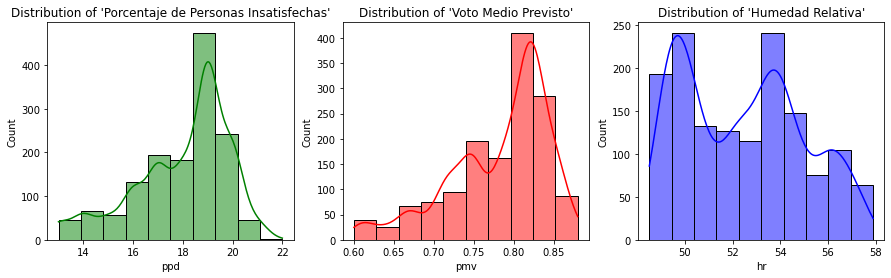

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

sns.histplot(ax = axes[0], x = df["ppd"],
             bins = 10,
             kde = True,
             color = "g").set(title = "Distribution of 'Porcentaje de Personas Insatisfechas'");

sns.histplot(ax = axes[1], x = df["pmv"],
             bins = 10,
             kde = True,
             color = "r").set(title = "Distribution of 'Voto Medio Previsto'");

sns.histplot(ax = axes[2], x = df["hr"],
             bins = 10,
             kde = True,
             color = "b").set(title = "Distribution of 'Humedad Relativa'");

Podemos ver que hay correlación entre algunas variables.

#### Correlación
- La correlación indica la fuerza y la dirección de una relación lineal y proporcionalidad entre dos variables estadísticas.

Utilizaremos la función `sns.heatmap()` para ver de manera sencilla la correlación que existe entre nuestras variables.

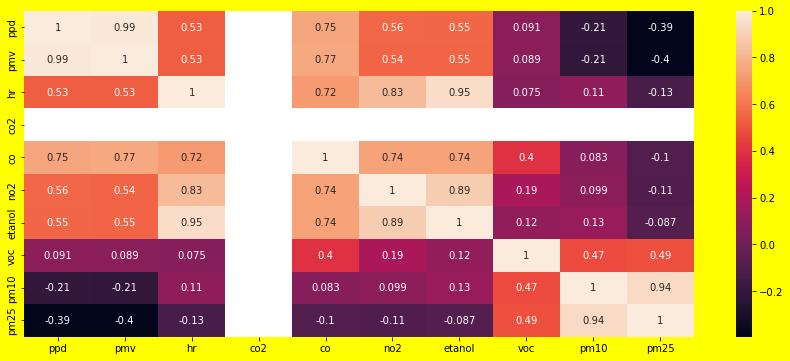

In [12]:
plt.figure(figsize = [15, 6], facecolor = 'yellow')
sns.heatmap(df.corr(), annot=True);

Podemos ver que las variables `pmv` y `co` poseen correlación alta con la variable `ppd`. Con ayuda de la función `regplot()` podemos ver la gráfica que nos muestra la relación lineal entre estas variables.

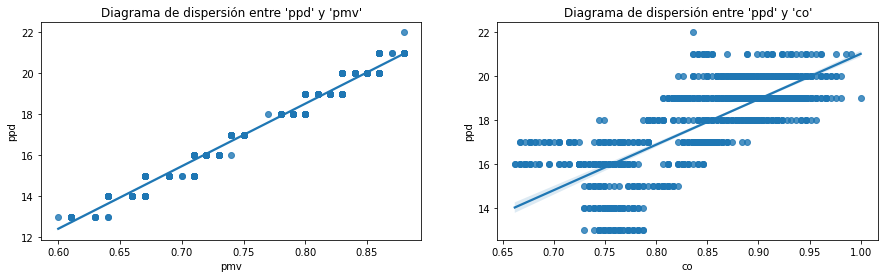

In [61]:
fig, axes = plt.subplots(1, 2, figsize=(15, 4))

sns.regplot(ax = axes[0], x="pmv", y="ppd", data=df);
sns.regplot(ax = axes[1], x="co", y="ppd", data=df);
axes[0].title.set_text("Diagrama de dispersión entre 'ppd' y 'pmv'")
axes[1].title.set_text("Diagrama de dispersión entre 'ppd' y 'co'")

#### Valor P
- El valor P es el valor de probabilidad de que la correlación entre dos variables sea estadísticamente significativa.

Entonces a continuación evaluaremos que tan significativa es la relación entre las variables escogidas con ayuda de la función `stats.pearsonr`.

**pmv vs ppd**

In [68]:
from scipy import stats
coeficiente_pearson, valor_p = stats.pearsonr(df['ppd'], df['pmv'])
print("El coeficiente de la Correlación de Pearson es", round(coeficiente_pearson,3), " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.988  con un valor de P = 0.0


Dado que el valor P es $<$ 0.001, la correlación entre el `Voto Medio Previsto (pmv)` y el `Porcentaje de Personas Insatisfechas (ppd)` es estadísticamente significativa.

**co vs ppd**

In [69]:
from scipy import stats
coeficiente_pearson, valor_p = stats.pearsonr(df['ppd'], df['co'])
print("El coeficiente de la Correlación de Pearson es", round(coeficiente_pearson,3), " con un valor de P =", valor_p)

El coeficiente de la Correlación de Pearson es 0.754  con un valor de P = 1.1717160227211844e-264


Dado que el valor P es $<$ 0.001, la correlación entre el `Monoxido de Carbono (co)` y el `Porcentaje de Personas Insatisfechas (ppd)` es estadísticamente significativa.

#### Análisis de Varianza
- El Análisis de Varianza (ANOVA, del inglés ANalysis Of VAriance) es el método estadístico que no sayuda a probar si existen diferencias significativas entre las medias de dos o más grupos.

